<a href="https://colab.research.google.com/github/brioglade/gmt/blob/main/pygmt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt update
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,311 kB]
Hit:13 http://

In [2]:
!git clone --depth 50 https://github.com/GenericMappingTools/gmt

Cloning into 'gmt'...
remote: Enumerating objects: 4048, done.
remote: Counting objects: 100% (4048/4048), done.
remote: Compressing objects: 100% (3546/3546), done.
remote: Total 4048 (delta 687), reused 1788 (delta 436), pack-reused 0
Receiving objects: 100% (4048/4048), 21.30 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (687/687), done.


In [3]:
!cmake /content/gmt

CMake version: 3.22.6
-- The C compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Found UnixCommands: /bin/bash  
-- Found Git: /usr/bin/git (found version "2.17.1") 
-- Searching dependent libraries. This may take a few minutes...
-- Looking for nc_def_var_deflate
-- Looking for nc_def_var_deflate - found
-- Found NETCDF: /usr/lib/x86_64-linux-gnu/libnetcdf.so;/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5_hl.so;/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5.so;/usr/lib/x86_64-linux-gnu/libpthread.so;/usr/lib/x86_64-linux-gnu/libsz.so;/usr/lib/x86_64-linux-gnu/libz.so;/usr/lib/x86_64-linux-gnu/libdl.so;/usr/lib/x86_64-linux-gnu/libm.so;/usr/lib/x86_64-linux-gnu/libcurl.so  
-- Found CURL: /usr/lib/x86_64-linux-gnu/libcurl.so (found version "7.58.0")  
-- Found GDAL: /usr/lib/libgdal.so  
-- Found GEOS:

In [4]:
!cmake --build . --target install

[  0%] Generating gmt_keycases.h, gmt_keywords.h
[  0%] Generating gmt_dimensions.h
[  0%] Generating gmt_core_moduleinfo.h
[  0%] Built target gen_gmt_headers
[  0%] Building C object src/CMakeFiles/pslib.dir/postscriptlight.c.o
[  0%] Linking C shared library libpostscriptlight.so
[  2%] Built target pslib
[  2%] Building C object src/CMakeFiles/gmtlib.dir/clear.c.o
[  2%] Building C object src/CMakeFiles/gmtlib.dir/begin.c.o
[  2%] Building C object src/CMakeFiles/gmtlib.dir/gmt_modern.c.o
[  4%] Building C object src/CMakeFiles/gmtlib.dir/end.c.o
[  4%] Building C object src/CMakeFiles/gmtlib.dir/gmt_remote.c.o
/content/gmt/src/gmt_remote.c: In function ‘gmt_get_dataset_tiles’:
/content/gmt/src/gmt_remote.c:1596:31: warning: ‘__builtin___sprintf_chk’ may write a terminating nul past the end of the destination [-Wformat-overflow=]
   sprintf (coverage_file, "@%s", I->coverage); /* Prepend the remote flag since we may need to download the file */
                               ^
In f

In [5]:
!pip install pygmt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.4 MB/s 


In [ ]:
# https://www.youtube.com/watch?v=U376Q2CkKhQ
import os

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(os.path.relpath(root,start = os.curdir), name)

In [ ]:
#Connect Google Drive to Google Colab
#=====================================
from google.colab import drive
drive.mount('/content/drive')

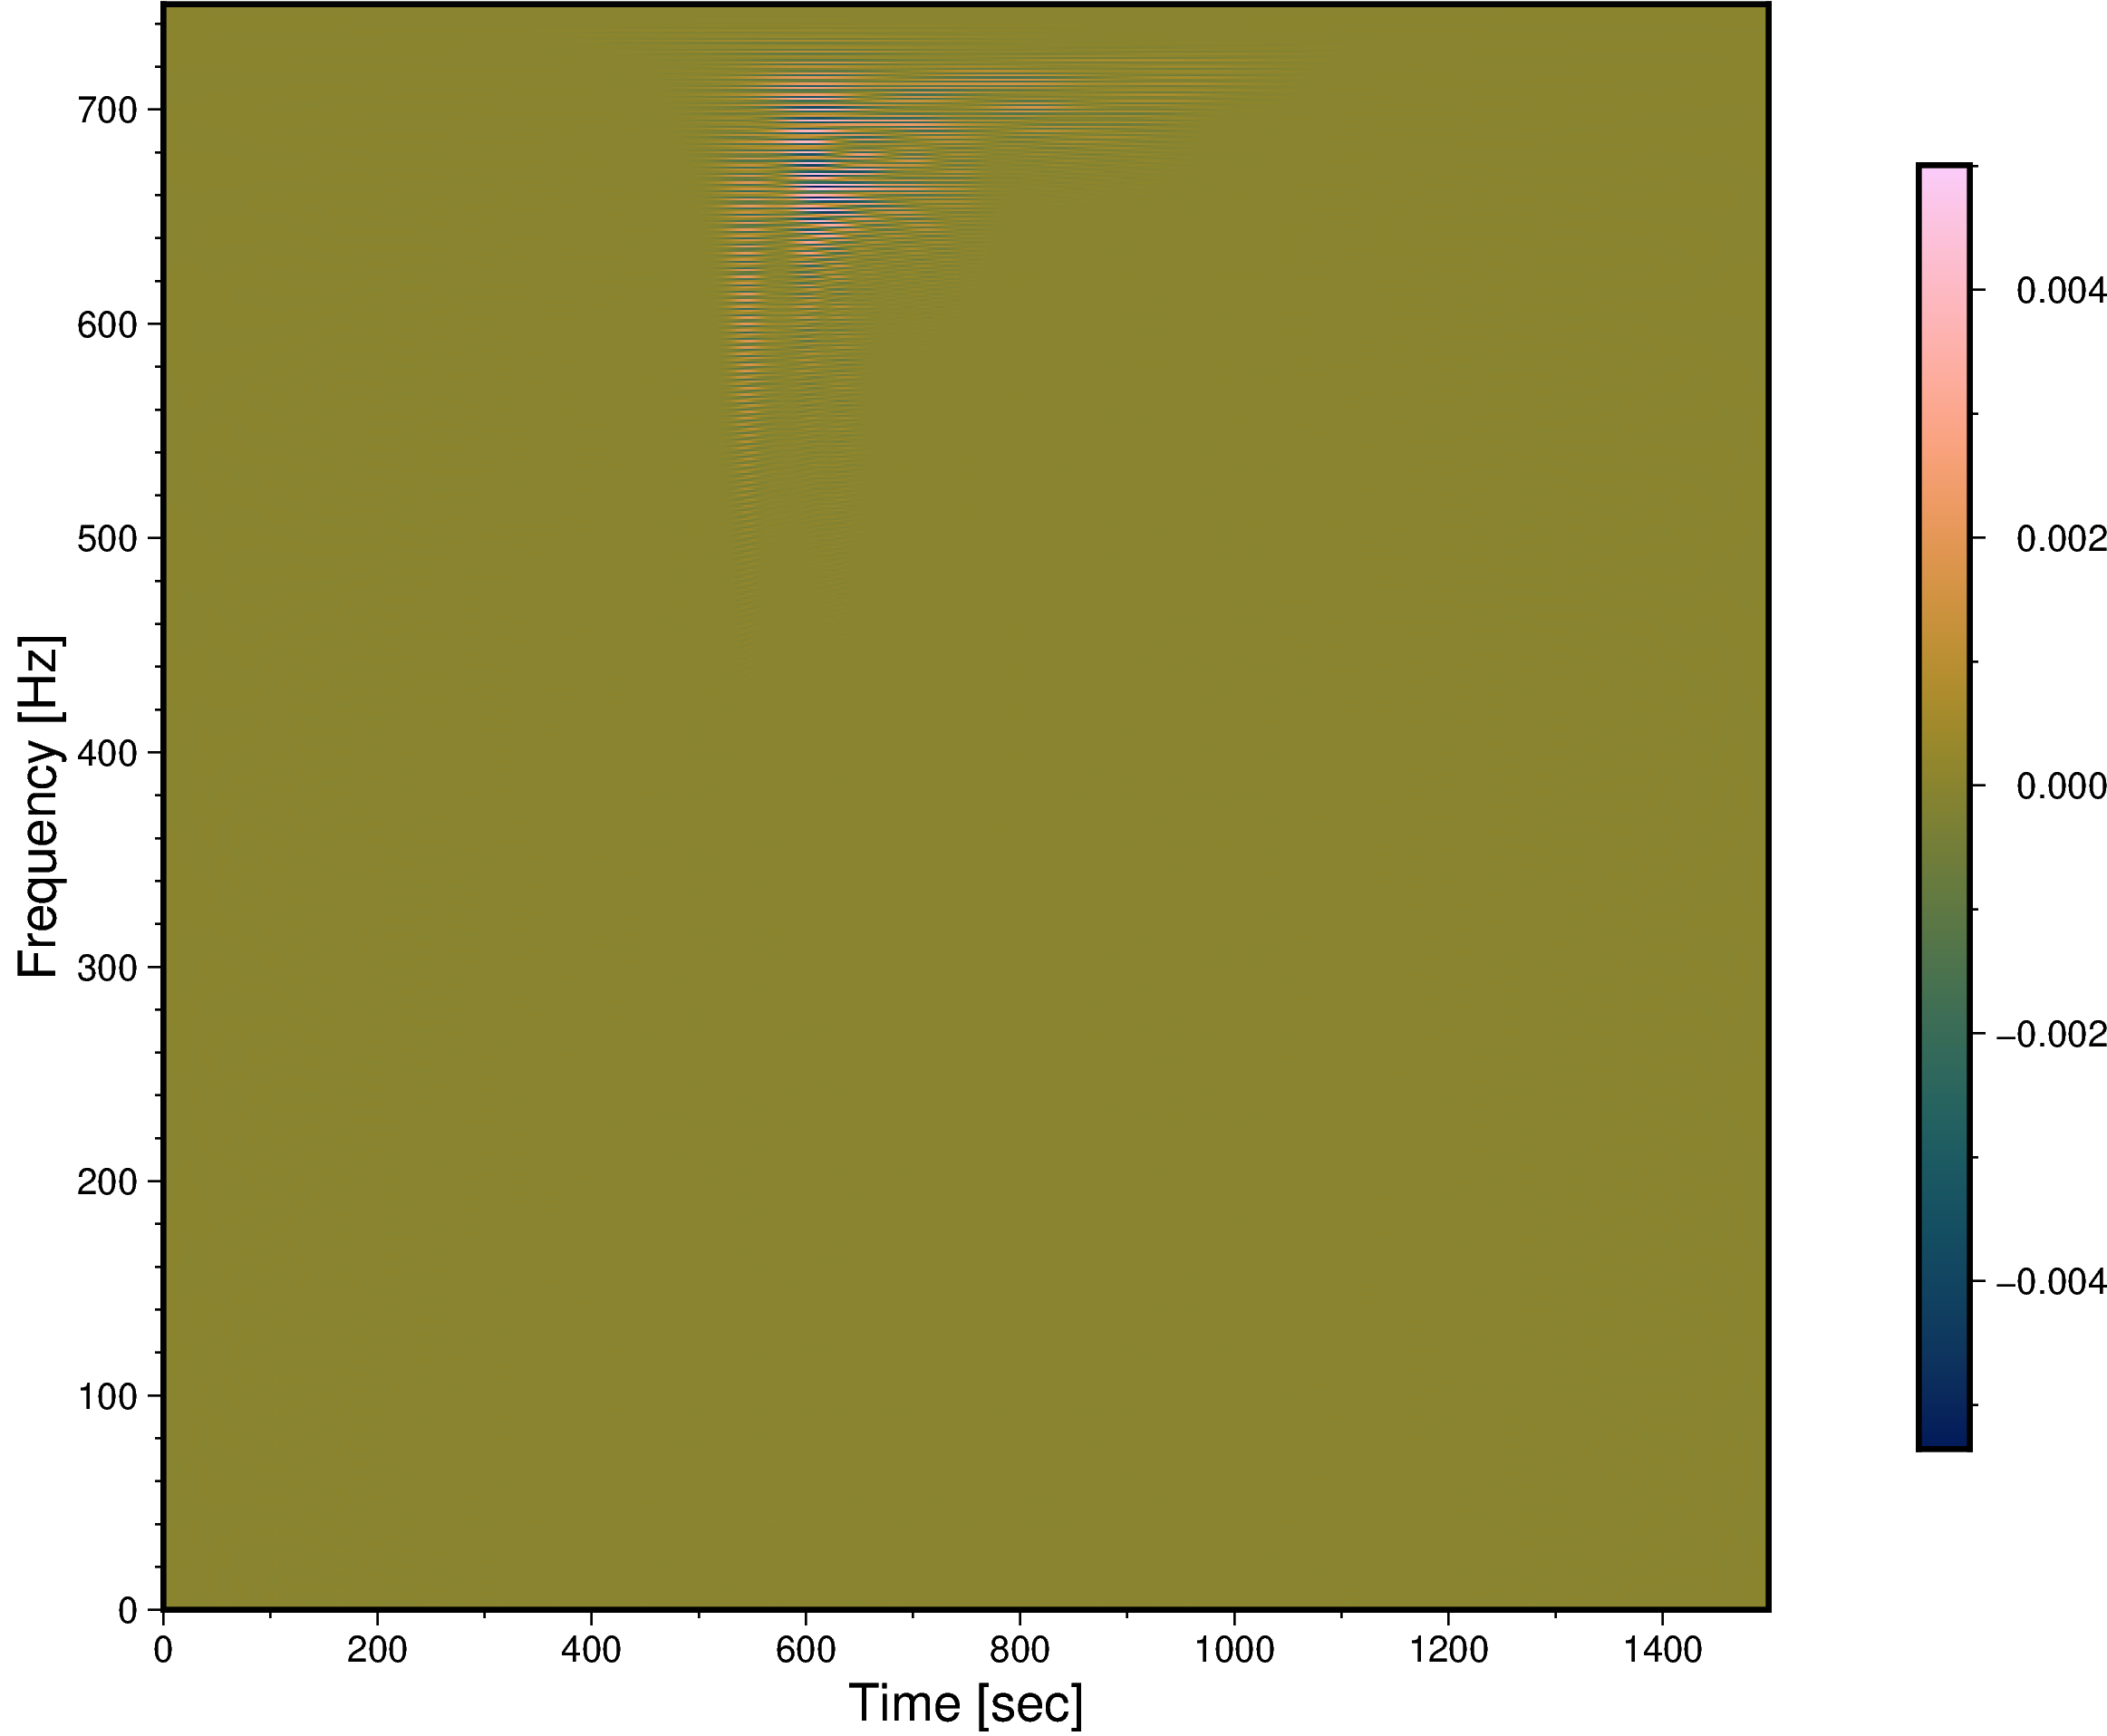

In [8]:
import numpy as np
import pygmt
import xarray as xr

# Load 2D data
array = np.loadtxt(fname="/content/drive/MyDrive/data.txt")
assert array.shape == (750, 1500)

# Convert numpy.array to xarray.DataArray
dataarray = xr.DataArray(data=array)

# Plot figure
fig = pygmt.Figure()
fig.grdimage(
    grid=dataarray, cmap="batlow", frame=["xaf+lTime [sec]", "yaf+lFrequency [Hz]"]
)
fig.colorbar(position="JMR")
fig.savefig(fname="freq_over_time.png")
fig.show()